In [1]:
import topography

### 3D Sea-ice surface plot
- Illustration of the CA model as a 3D stacked-bar chart

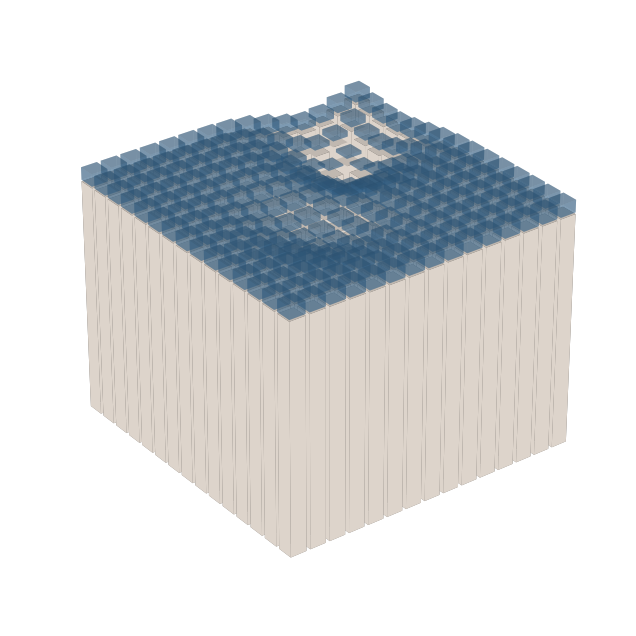

In [2]:
size = 10

h, X, Y = topography.multi_valley(size=size)

import numpy as np
import matplotlib.pyplot as plt


def draw_3d_CA():
    sidelen = 15
    np.random.seed(100)

    # Generate example cellular automaton data
    H, X, Y = topography.multi_valley(size=sidelen)
    h = H * np.random.random()  # water
    H = H * 2
    # Create a meshgrid for x, y coordinates
    x, y = np.meshgrid(np.arange(H.shape[1]), np.arange(H.shape[0]))

    # Flatten the arrays to create bars in the 3D plot
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)
    z, _, _ = topography.multi_valley(size=sidelen)
    z = z.flatten() * np.random.random() * 1.3
    dx = dy = 0.8
    dz = H.flatten()
    dz2 = h.flatten()
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(111, projection='3d')
    ax.grid(False)
    ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

    plt.axis('off')

    nonzero_indices = dz > 0
    nonzero_indices2 = dz2 > 0

    # Ice
    ax.bar3d(x[nonzero_indices], y[nonzero_indices], z[nonzero_indices],
             dx, dy, dz[nonzero_indices] + .38, color='linen', shade=True, alpha=1)  # +.3 azure, seashell,linen
    # Water
    ax.bar3d(x[nonzero_indices2], y[nonzero_indices2], dz[nonzero_indices] + .4,
             dx, dy, dz2[nonzero_indices2], color='steelblue', shade=True, alpha=.4)

    ax.view_init(elev=30, azim=360 - 37)
    # ax.view_init(elev=70, azim=360-60)
    plt.gca().invert_xaxis()

    plt.show()


draw_3d_CA()

### Entropy vs Control Parameter

- increase in the control parameter leads to increase of entropy/distorder of the topography
- this behaviour is intended and indicates we are using a meaningful control paramter

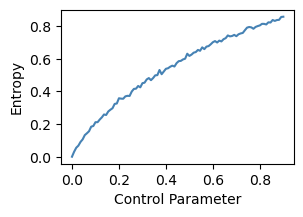

In [3]:
order_func = topography.entropy_topology_noscale

control_parameter_range = np.linspace(0.1, 1, 100)
order_parameters = []

for control_parameter in control_parameter_range:
    dist = topography.order_distribution(control_parameter,size=100)
    res = order_func(dist)
    order_parameters.append(res)


plt.figure(figsize=(12/4,8/4))
plt.plot(1-control_parameter_range, order_parameters,"steelblue")
plt.xlabel("Control Parameter")
plt.ylabel("Entropy")
# plt.title("Entropy vs. Control Parameter")
plt.savefig("entropy_vs_control_parameter", bbox_inches="tight", dpi=300, transparent=True)

### Topography based on real data
- topography based on helicopter images and alimentary data.
- Code taken from Popovic et al., 2020 (https://doi.org/10.1029/2019JC016029) available under https://zenodo.org/record/3930528



In [4]:
size = 100
x,y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
mode = 'snow_dune'              # topography type
tmax = 2; dt = 0.1              # diffusion time and time-step if mode = 'diffusion' or mode = 'rayleigh'
g = 1                           # anisotropy parameter
sigma_h = 0.03                  # surface standard deviation
snow_dune_radius = 1.           # mean snow dune radius if mode = 'snow_dune'
Gaussians_per_pixel = 0.2       # density of snow dunes if mode = 'snow_dune'
snow_dune_height_exponent = 1.  # exponent that relates snow dune radius and snow dune height if mode = 'snow_dune'

mean_freeboard = 0.1

Tdrain = 10.; dt_drain = 0.5    # time and time-step of to drainage

# create topography
z = topography.Create_Initial_Topography(res = size, mode = mode, tmax = tmax, dt = dt, g = g, sigma_h = sigma_h, h = mean_freeboard, snow_dune_radius = snow_dune_radius,
            Gaussians_per_pixel = Gaussians_per_pixel, number_of_r_bins = 150, window_size = 5, snow_dune_height_exponent = snow_dune_height_exponent)



/Users/paulhosek/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/paulhosek/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


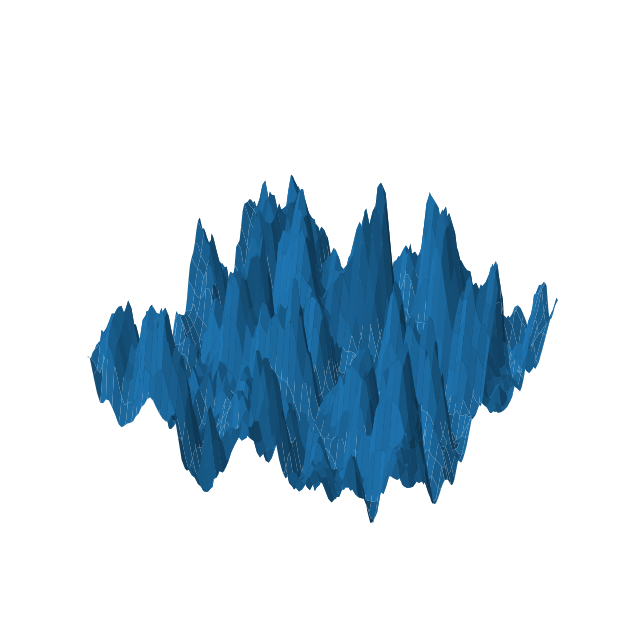

In [5]:
fig = plt.figure(figsize=(11,8))
ax2 = fig.add_subplot(111,projection="3d")
ax2.plot_surface(x, y, z)
plt.axis("off")
plt.savefig(f"snow_dune",bbox_inches="tight", dpi=300, transparent=True)

### Order Parameter scan
- Changing the control parameter from 0-1 to find the point where fractal dimension 2 emerges.
- Emergence of fractal dimension 2 is tested by a t-test in regression slopes fitted to the top and bottom 30% of the perimeter vs. area plot.

In [10]:
raise Exception("This will take a long time to run, we let it run over 48h.")

Exception: This will take a long time to run, we let it run over 48h.

In [ ]:
control_parameter_range, order_parameters, entropys = evaluation.main_topography_change_order(size=1000)

In [ ]:
plt.figure(figsize=(11/2,8/2))
plt.plot(control_parameter_range, 1-np.array(order_parameters),"steelblue", label="order paramter")
# plt.plot(control_parameter_range, entropys,"orange", label="entropy")
plt.xlabel("Control Parameter")
plt.ylabel("Order Parameter")
plt.title("Order Parameter vs Control Parameter")
plt.legend()
# plt.savefig("order_vs_control parameter", bbox_inches="tight", dpi=300,transparent=True)
plt.show